# NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---


# Homework 1 - Supervised Deep Learning

In [ ]:
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv 

--2022-09-01 20:35:40--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
Resolving gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
Connecting to gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3776 (3.7K) [text/plain]
Saving to: ‘regression_dataset/train_data.csv’

train_data.csv      100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-09-01 20:35:41 (90.6 MB/s) - ‘regression_dataset/train_data.csv’ saved [3776/3776]

--2022-09-01 20:35:41--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv
Resolving gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
Connecting to gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3788 (3.7K) [text/plain]
Saving to: ‘regression_dataset/test_data.csv’

test_data.csv 

In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 4.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn import preprocessing



In [ ]:
train_df = pd.read_csv('regression_dataset/train_data.csv')
test_df = pd.read_csv('regression_dataset/test_data.csv')


SAMPLE AT INDEX 1
INPUT: -3.509057030228774
LABEL: 3.2775811005367035


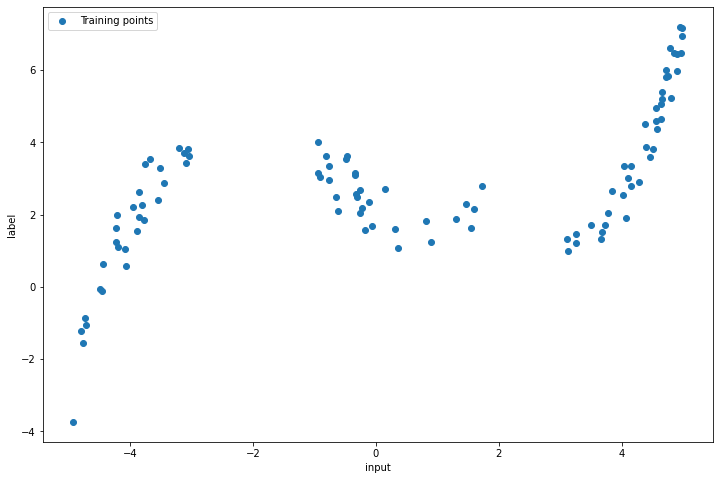

In [ ]:
sample_index = 1
input = train_df.iloc[sample_index]['input']
label = train_df.iloc[sample_index]['label']

print(f"SAMPLE AT INDEX {sample_index}")
print(f"INPUT: {input}")
print(f"LABEL: {label}")

fig = plt.figure(figsize=(12,8))
plt.scatter(train_df.input, train_df.label, label='Training points')
plt.xlabel('input')
plt.ylabel('label')
plt.savefig("regression_dataset.png")
plt.legend()
plt.show()

max value :2.4586691562287664,min value : -3.5202291494286118


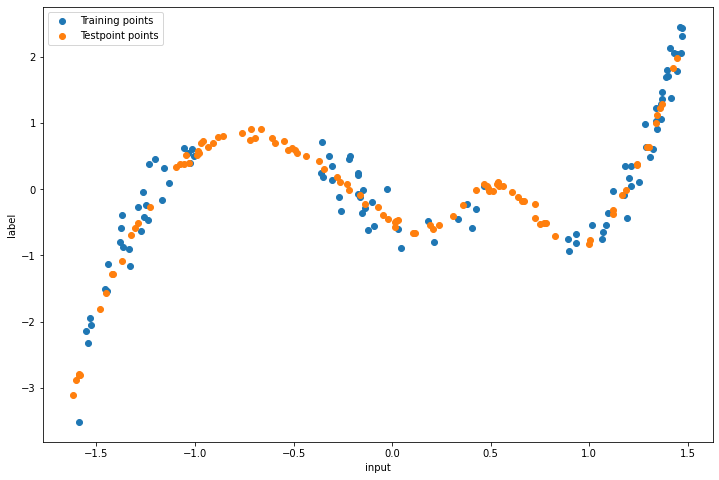

In [ ]:
# Applying standard scaler

scaler = preprocessing.StandardScaler()
con_data = pd.concat([train_df,test_df],axis=0)
scaler.fit(con_data)

train_df=scaler.transform(train_df)
test_df=scaler.transform(test_df)
print(f"max value :{train_df.max()},min value : {train_df.min()}")


fig = plt.figure(figsize=(12,8))
plt.scatter(train_df[:,0], train_df[:,1], label='Training points')

plt.scatter(test_df[:,0], test_df[:,1], label='Testpoint points')
plt.xlabel('input')
plt.ylabel('label')
plt.savefig("regression_dataset.png")
plt.legend()
plt.show()

In [ ]:
X_train = train_df[:,0]
y_train = train_df[:,1]
X_test = test_df[:,0]
y_test = test_df[:,1]


X_train = np.expand_dims(X_train, 1).astype(np.float32)
y_train = np.expand_dims(y_train, 1).astype(np.float32)
X_test = np.expand_dims(X_test, 1).astype(np.float32)
y_test = np.expand_dims(y_test, 1).astype(np.float32)



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 1)
(100, 1)
(100, 1)
(100, 1)


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Available Device : ", device)

Available Device :  cuda


In [ ]:
class Reg(nn.Module):
  def __init__(self, Ni, Nh1,Nh2,Nh3,No,dropout = 0):
    super().__init__()
    self.l1 = nn.Linear(Ni,Nh1)
    self.l2 = nn.Linear(Nh1,Nh2)
    self.l3 = nn.Linear(Nh2,Nh3)

    self.out = nn.Linear(Nh3,No)
    self.act = nn.ReLU()
    self.drop = nn.Dropout(dropout)
    # self.batch = nn.BatchNorm1d(Nh2)

  def forward(self,x):
    x= self.act(self.l1(x))
    x= self.drop(x)
    x= self.act(self.l2(x))
    x= self.drop(x)
    x= self.act(self.l3(x))
    x= self.drop(x)

    x= self.act(self.out(x))
    return x


In [ ]:
class Net(nn.Module):
    
    def __init__(self,Ni, Nh1, Nh2,Nh3, No,dropout=0):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        # print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.fc3 = nn.Linear(in_features=Nh2,out_features=Nh3)
        self.out = nn.Linear(in_features=Nh3, out_features=No)
        self.act = nn.ReLU()
        self.act2 = nn.ReLU()
        self.drop=nn.Dropout(dropout)

        
    def forward(self, x, additional_out=False):
        x = self.act(self.fc1(x))
        # x =self.drop(x) 
        x = self.act(self.fc2(x))
        # x =self.drop(x) 
        x = self.act(self.fc3(x))
        # x =self.drop(x) 
        x = self.out(x)
        return x

<function matplotlib.pyplot.show(*args, **kw)>

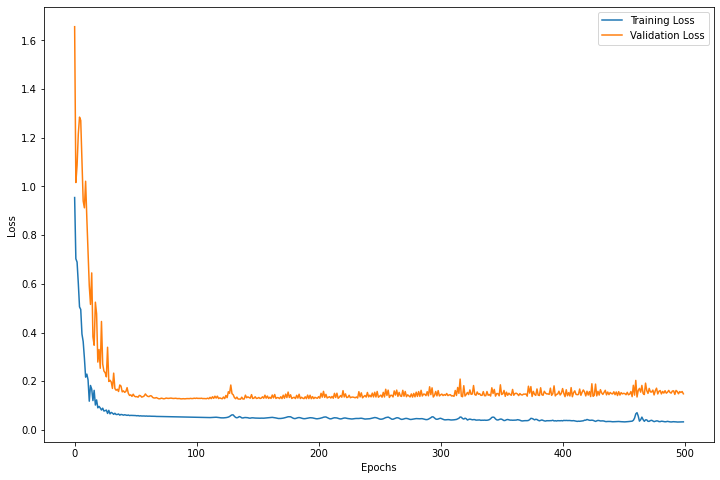

In [ ]:
import skorch
from skorch import NeuralNetRegressor

Regressor = NeuralNetRegressor(
    module=Net,
    module__Ni=1,
    module__Nh1=64,
    module__Nh2=128,
    module__Nh3=256,
    module__No=1,
    max_epochs=500,
    device=device,
    lr = 0.01,
    module__dropout=0.2, 
    train_split=skorch.dataset.ValidSplit(5),
    iterator_train__shuffle=True,
    optimizer=optim.Adam,
    optimizer__lr=0.01,
    optimizer__weight_decay=1e-5,
    criterion=nn.MSELoss,
    verbose=0,
    #callbacks=[skorch.callbacks.EarlyStopping(patience=5)]



)

Regressor = Regressor.fit(X_train,y_train)


train_loss = Regressor.history[:,'train_loss']
val_loss = Regressor.history[:,'valid_loss']

plt.figure(figsize = (12,8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc= 'upper right')
plt.savefig("regression_dataset.png")
plt.show

In [ ]:
y_predict = Regressor.predict(X_test)
# print(y_predict.shape)
# print(y_test.shape)

y_predict = torch.from_numpy(y_predict).float()
y_test=torch.from_numpy(y_test)

loss = nn.MSELoss()

total_loss = loss(y_predict, y_test)
print(total_loss)

tensor(0.0297)


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


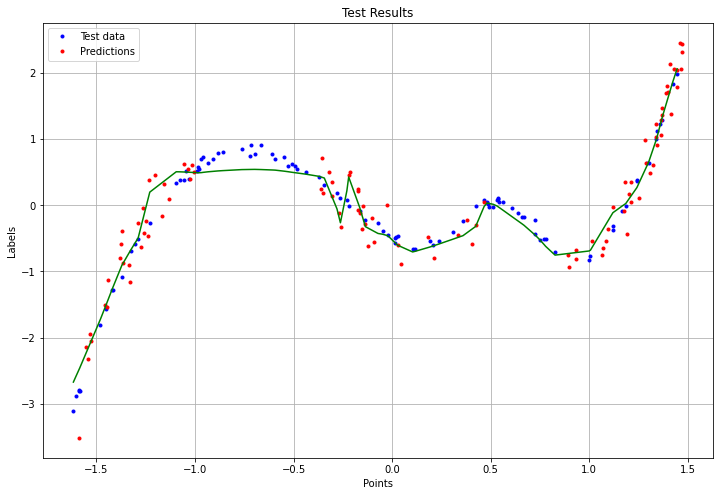

In [ ]:
#Plot Test points vs Prdicted points
zipped_lists = zip(X_test, y_predict)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X, y = [ list(tuple) for tuple in  tuples]

plt.figure(figsize=(12,8))
plt.plot(X_test, y_test, color='b', ls='' ,marker='.')
plt.plot(X_train, y_train, color='r', ls='',  marker='.')

plt.plot(X, y, color='g', )
plt.title('Test Results')
plt.xlabel('Points')
plt.ylabel('Labels')
plt.grid()
plt.legend(['Test data', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'module__Nh1' : [64,128] ,
    'module__Nh2' : [128,256] ,
    'module__Nh3' : [256,512] ,
    'optimizer__lr' : [0.01, 0.02,0.001],
    'max_epochs' : [60],
    'module__dropout': [0.2,0.25], 
    'optimizer__weight_decay' : [1e-5,1e-2 ] 
              
}

gridsr = GridSearchCV(Regressor, parameters, cv=3, scoring='neg_root_mean_squared_error', refit = True)
gridsr.fit(X_train,y_train)

print(f"Best Paramters Score: {gridsr.best_score_}" )
print(f"Best Paramters Score: {gridsr.best_params_}" )
best_reg  = gridsr.best_estimator_



Best Paramters Score: -0.9467083315054575
Best Paramters Score: {'max_epochs': 60, 'module__Nh1': 128, 'module__Nh2': 256, 'module__Nh3': 512, 'module__dropout': 0.25, 'optimizer__lr': 0.02, 'optimizer__weight_decay': 1e-05}


<function matplotlib.pyplot.show(*args, **kw)>

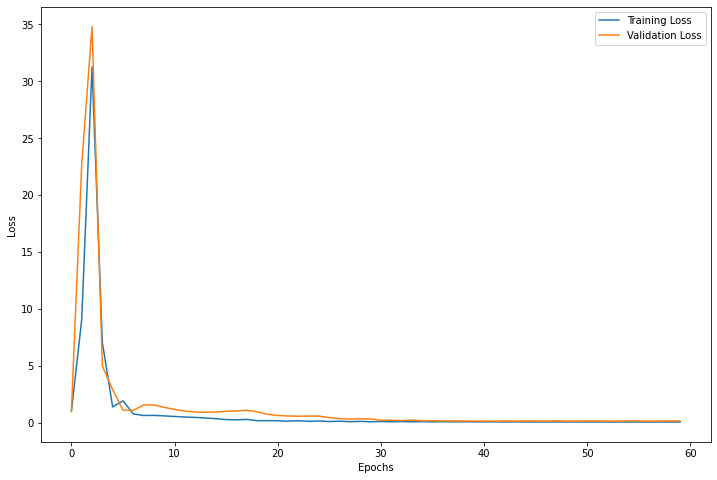

In [ ]:
best_model = best_reg.fit(X_train,y_train)

train_loss = best_model.history[:,'train_loss']
val_loss = best_model.history[:,'valid_loss']

plt.figure(figsize = (12,8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc= 'upper right')
plt.savefig("regression_dataset.png")
plt.show






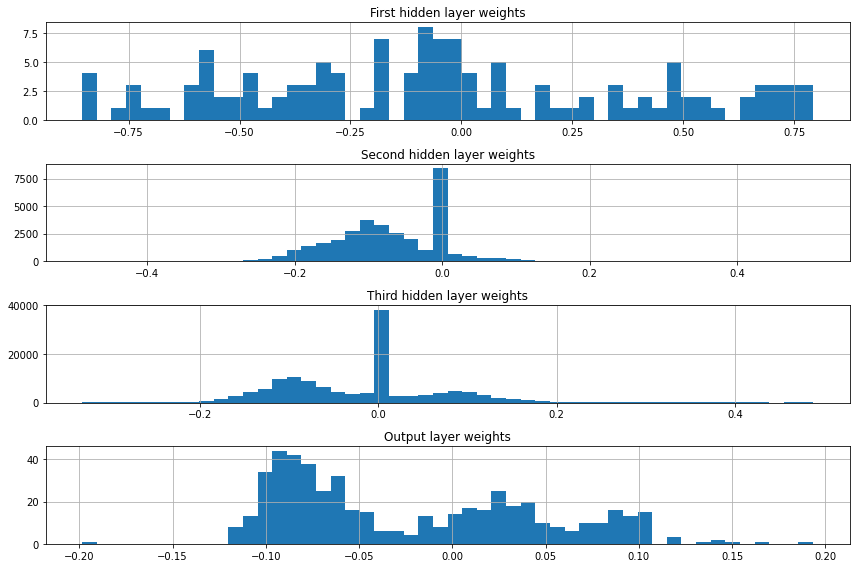

In [ ]:
# First hidden layer
h1_w = best_model.module_.fc1.weight.data.cpu().numpy()
h1_b = best_model.module_.fc1.bias.data.cpu().numpy()

# Second hidden layer
h2_w = best_model.module_.fc2.weight.data.cpu().numpy()
h2_b = best_model.module_.fc2.bias.data.cpu().numpy()

h3_w = best_model.module_.fc3.weight.data.cpu().numpy()
h3_b = best_model.module_.fc3.bias.data.cpu().numpy()

# Output layer
out_w = best_model.module_.out.weight.data.cpu().numpy()
out_b = best_model.module_.out.bias.data.cpu().numpy()

# Weights histogram
fig, axs = plt.subplots(4, 1, figsize=(12,8))
axs[0].hist(h1_w.flatten(), 50)
axs[0].set_title('First hidden layer weights')
axs[1].hist(h2_w.flatten(), 50)
axs[1].set_title('Second hidden layer weights')
axs[2].hist(h3_w.flatten(), 50)
axs[2].set_title('Third hidden layer weights')
axs[3].hist(out_w.flatten(), 50)
axs[3].set_title('Output layer weights')
[ax.grid() for ax in axs]
plt.tight_layout()
plt.show()